## 1. HDF5 是什么？

**HDF5（Hierarchical Data Format version 5）**
是一种用于 **存储和管理大规模、复杂科学数据的二进制文件格式及其配套库**。

* 由 **NCSA（美国国家超级计算应用中心）** 开发
* 广泛用于：

  * 科学计算
  * 工程仿真
  * 医学影像
  * 深度学习数据集存储

✅ 核心特点：
**一个文件 = 多数据集 + 层级结构 + 高效读取**

---

## 2. HDF5 的核心结构

### 2.1 层级结构（Hierarchy）

HDF5 文件的组织方式 **类似操作系统的文件系统**：

```text
HDF5 文件
├── Group（组，类似文件夹）
│   ├── Dataset（数据集）
│   └── Dataset
└── Group
    └── Dataset
```

* 使用 **路径** 访问数据

  * 如：`/train/train_set_x`

---

### 2.2 Dataset（数据集）

Dataset 是 HDF5 中 **真正存储数据的实体**。

特点：

* 本质是 **N 维数组**
* 支持：

  * 标量
  * 向量
  * 矩阵
  * 高维张量

常见数据类型：

* `int`
* `float`
* `string`
* 复合结构（类似 C 的 struct）

---

### 2.3 Attribute（属性）

Attribute 用于存储 **元信息（Metadata）**。

常见用途：

* 数据说明
* 单位（Hz、ms、V）
* 类别含义
* 采样率

✅ Attribute 不用于大规模数据，仅用于描述性信息。

---

## 3. 为什么使用 HDF5？

### 3.1 支持超大规模数据

* 单文件可达 **GB / TB 级**
* 适用于：

  * 图像数据
  * 时序信号
  * 医疗数据
  * 传感器数据

---

### 3.2 高性能 I/O

* 二进制存储，读取速度快
* 支持 **按需读取（切片 / 索引）**

```python
x = dataset[0:32]   # 只读取前 32 个样本
```

✅ 非常适合 mini-batch 训练

---

### 3.3 支持压缩与分块（Chunking）

* 内置压缩（如 gzip）
* 分块存储（chunk）优势：

  * 降低内存占用
  * 提高随机访问效率

---

### 3.4 跨语言支持

HDF5 几乎是 **科研通用格式**：

* Python（`h5py` / `PyTables`）
* C / C++
* MATLAB
* Java
* Fortran

---

## 4. HDF5 与常见数据格式对比

| 格式        | 特点             | 适用场景          |
| --------- | -------------- | ------------- |
| CSV / TXT | 可读性强，体积大，慢     | 小规模表格         |
| JSON      | 层级结构，冗余高       | 配置文件          |
| NPY       | 单数组，高效         | 单变量存储         |
| **HDF5**  | 多数据集 + 层级 + 高效 | **科研 / 深度学习** |

✅ **HDF5 是多数组、多模态数据的最佳实践之一**

---

## 5. HDF5 在深度学习中的典型用途

常见文件命名：

* `train_xxx.h5`
* `test_xxx.h5`

典型内容：

* 训练数据
* 测试数据
* 标签
* 类别说明

### 示例结构（猫 vs 非猫）

```text
/train_set_x   → 图像数据 (m, H, W, C)
/train_set_y   → 标签 (m,)
 /test_set_x
 /test_set_y
 /classes      → 类别名称
```

---

## 6. Python 读取 HDF5（基础示例）

```python
import h5py

with h5py.File("train_catvnoncat.h5", "r") as f:
    print(list(f.keys()))       # 查看文件中的内容
    x = f["train_set_x"][:]     # 读取数据
    y = f["train_set_y"][:]
```

✅ `[:]` 表示一次性读取
✅ 可以使用切片避免内存爆炸

---

## 7. 一句话总结

> **HDF5 是一种高性能、层级化、面向大规模科学数据的二进制存储格式，是深度学习数据集管理的常用方案。**

---


In [1]:
# 查看 datasets 中的 h5 文件
import h5py

file_path = r"./datasets/train_catvnoncat.h5"

with h5py.File(file_path, "r") as f:
    print("Key in train_catvnoncat.h5:")
    for key in f.keys():
        print(" -" + key + "信息: ", f[key])
        print(" --" + key + "内容: ", f[key][:])

Key in train_catvnoncat.h5:
 -list_classes信息:  <HDF5 dataset "list_classes": shape (2,), type "|S7">
 --list_classes内容:  [b'non-cat' b'cat']
 -train_set_x信息:  <HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
 --train_set_x内容:  [[[[ 17  31  56]
   [ 22  33  59]
   [ 25  35  62]
   ...
   [  1  28  57]
   [  1  26  56]
   [  1  22  51]]

  [[ 25  36  62]
   [ 28  38  64]
   [ 30  40  67]
   ...
   [  1  27  56]
   [  1  25  55]
   [  2  21  51]]

  [[ 32  40  67]
   [ 34  42  69]
   [ 35  42  70]
   ...
   [  1  25  55]
   [  0  24  54]
   [  1  21  51]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[196 192 190]
   [193 186 182]
   [188 179 174]
   ...
   [ 90 142 200]
   [ 90

---

## ✅ `h5py.File()`

### 功能

打开一个 HDF5（`.h5`）文件，使其可以被 Python 代码访问。

---

### 参数

```python
h5py.File(filename, mode)
```

| 参数         | 说明                |
| ---------- | ----------------- |
| `filename` | `.h5` 文件路径（字符串）   |
| `mode`     | 打开方式，常用 `"r"`（只读） |

---

### 返回值

* 返回一个 **File 对象**
* 该对象用于访问 `.h5` 文件中的数据集
* 行为上类似字典，可通过 `f[key]` 访问数据

---

### 函数逻辑简述

1. 打开指定路径的 `.h5` 文件
2. 读取文件的结构信息（数据集名称、层级）
3. 不加载实际数据内容，仅建立访问接口
4. 返回一个可用于后续读取数据的 File 对象

---


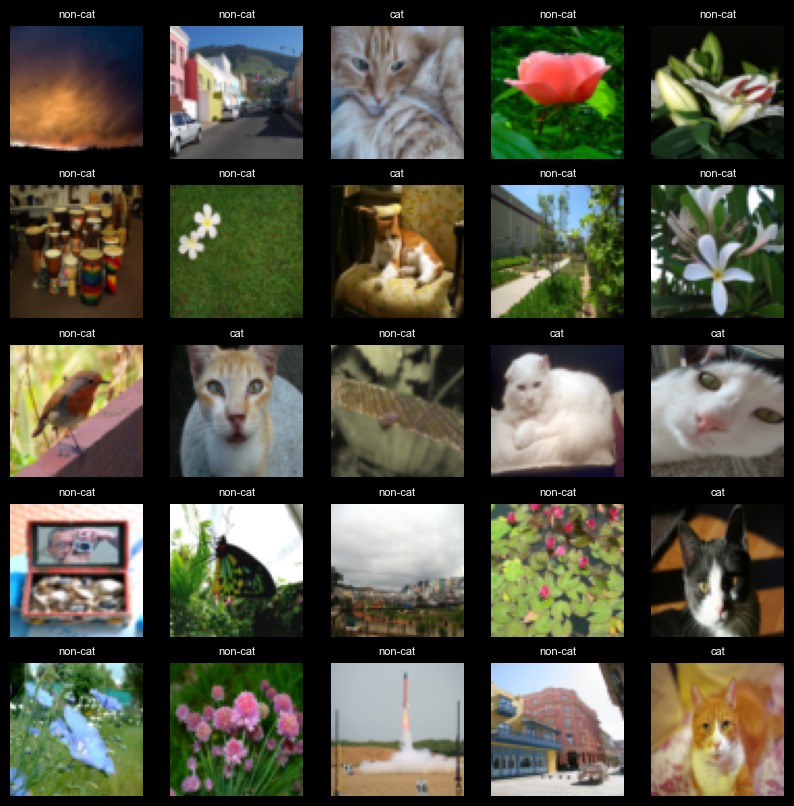

In [3]:
# 以网格形式查看多张图片
import h5py
import matplotlib.pyplot as plt

file_path = r"./datasets/train_catvnoncat.h5"

with h5py.File(file_path, "r") as f:
    # 用 [:] 一次性把数据读成 numpy 数组
    X = f["train_set_x"][:]      # shape: (209, 64, 64, 3)
    Y = f["train_set_y"][:]      # shape: (209,)
    classes = f["list_classes"][:]  # shape: (2,)

rows, cols = 5, 5
plt.figure(figsize=(10, 10))

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i])
    plt.title(classes[Y[i]].decode("utf-8"), fontsize=8)
    plt.axis("off")

plt.show()



训练集的数量: m_train = 209
测试集的数量 : m_test = 50
每张图片的宽/高 : num_px = 64
每张图片的大小 : (64, 64, 3)
训练集_图片的维数 : (209, 64, 64, 3)
训练集_标签的维数 : (1, 209)
测试集_图片的维数: (50, 64, 64, 3)
测试集_标签的维数: (1, 50)
train_set_y=[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


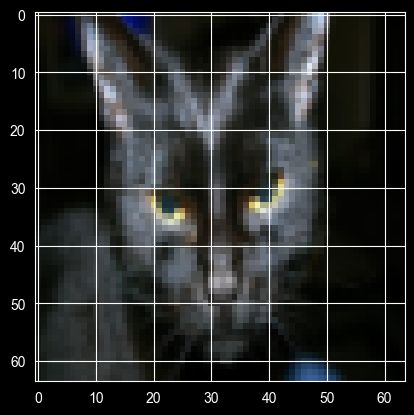

In [5]:
# 请记住，train_set_x_orig 是一个维度为(m_train，num_px，num_px，3）的数组。
import matplotlib.pyplot as plt
from lr_utils import load_dataset

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

m_train = train_set_x_orig.shape[0] #训练集里图片的数量。
m_test = test_set_x_orig.shape[0] #测试集里图片的数量。
num_px = train_set_x_orig.shape[1] #训练、测试集里面的图片的宽度和高度（均为64x64）。

#现在看一看我们加载的东西的具体情况~~~~
print ("训练集的数量: m_train = " + str(m_train))
print ("测试集的数量 : m_test = " + str(m_test))
print ("每张图片的宽/高 : num_px = " + str(num_px))
print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集_图片的维数 : " + str(train_set_x_orig.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集_图片的维数: " + str(test_set_x_orig.shape))
print ("测试集_标签的维数: " + str(test_set_y.shape))

# plt.imshow(train_set_x_orig[25])
# print("train_set_y=" + str(train_set_y))

In [9]:
#打印出当前的训练标签值
#使用np.squeeze的目的是压缩维度，【未压缩】train_set_y[:,index]的值为[1] , 【压缩后】np.squeeze(train_set_y[:,index])的值为1
#print("【使用np.squeeze：" + str(np.squeeze(train_set_y[:,index])) + "，不使用np.squeeze： " + str(train_set_y[:,index]) + "】")
#只有压缩后的值才能进行解码操作
import numpy as np
print("y=" + str(train_set_y[:,25]) + ", it's a " + classes[np.squeeze(train_set_y[:,25])].decode("utf-8") + "' picture")

y=[1], it's a cat' picture


In [13]:
# 为了方便，我们要把维度为（64，64，3）的numpy数组重新构造为（64 x 64 x 3，1）的数组，要乘以3的原因是每张图片是由64x64像素构成的，而每个像素点由（R，G，B）三原色构成的，所以要乘以3。在此之后，我们的训练和测试数据集是一个numpy数组，【每列代表一个平坦的图像】 ，应该有m_train和m_test列。
# X_flatten = X.reshape(X.shape [0]，-1).T ＃X.T是X的转置
# 将训练集的维度降低并转置。
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T # 每列代表一个图像
# print(train_set_x_flatten.shape)
# 将测试集的维度降低并转置。
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T
# print(test_set_x_flatten.shape)

# 这一段意思是指把数组变为209行的矩阵（因为训练集里有209张图片），但是我懒得算列有多少，于是我就用-1告诉程序你帮我算，最后程序算出来时12288列，我再最后用一个T表示转置，这就变成了12288行，209列。测试集亦如此。

print ("训练集降维最后的维度： " + str(train_set_x_flatten.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集降维之后的维度: " + str(test_set_x_flatten.shape))
print ("测试集_标签的维数 : " + str(test_set_y.shape))

训练集降维最后的维度： (12288, 209)
训练集_标签的维数 : (1, 209)
测试集降维之后的维度: (12288, 50)
测试集_标签的维数 : (1, 50)


* 为了表示彩色图像，必须为每个像素指定红色，绿色和蓝色通道（RGB），因此像素值实际上是从0到255范围内的三个数字的向量。机器学习中一个常见的预处理步骤是对数据集进行居中和标准化，这意味着可以减去每个示例中整个numpy数组的平均值，然后将每个示例除以整个numpy数组的标准偏差。但对于图片数据集，它更简单，更方便，几乎可以将数据集的每一行除以255（像素通道的最大值），因为在RGB中不存在比255大的数据，所以我们可以放心的除以255，让标准化的数据位于[0,1]之间，现在标准化我们的数据集：

In [22]:
train_set_x = train_set_x_flatten / 255.0
test_set_x = test_set_x_flatten / 255.0

[0.21960784 0.74509804 0.26666667 0.00784314 0.01960784 0.19607843
 0.09019608 0.00784314 0.23921569 0.04313725 0.46666667 0.01176471
 0.43137255 0.10980392 0.29019608 0.67843137 0.99607843 0.8745098
 0.27843137 0.00784314 0.00784314 0.00392157 0.72941176 0.93333333
 0.25490196 0.01960784 0.19607843 0.10196078 0.05098039 0.68627451
 0.02352941 0.79215686 0.93333333 0.4        0.91372549 0.09411765
 0.05098039 0.86666667 0.00392157 0.34509804 0.6        0.00784314
 0.12941176 1.         0.13333333 0.         0.21176471 0.14509804
 0.06666667 0.15294118 0.6627451  0.45098039 0.14509804 0.10588235
 0.03529412 1.         0.11372549 0.56078431 0.14117647 0.10196078
 0.24313725 0.41960784 0.24705882 0.20784314 0.28627451 0.15294118
 0.89803922 0.15294118 0.48235294 0.59607843 0.10196078 0.03921569
 0.02352941 0.27843137 0.3254902  0.43529412 0.09411765 0.00784314
 0.32156863 0.03529412 0.16470588 0.71764706 0.05098039 0.97254902
 0.6627451  0.01568627 0.09411765 0.09019608 0.47843137 0.13725

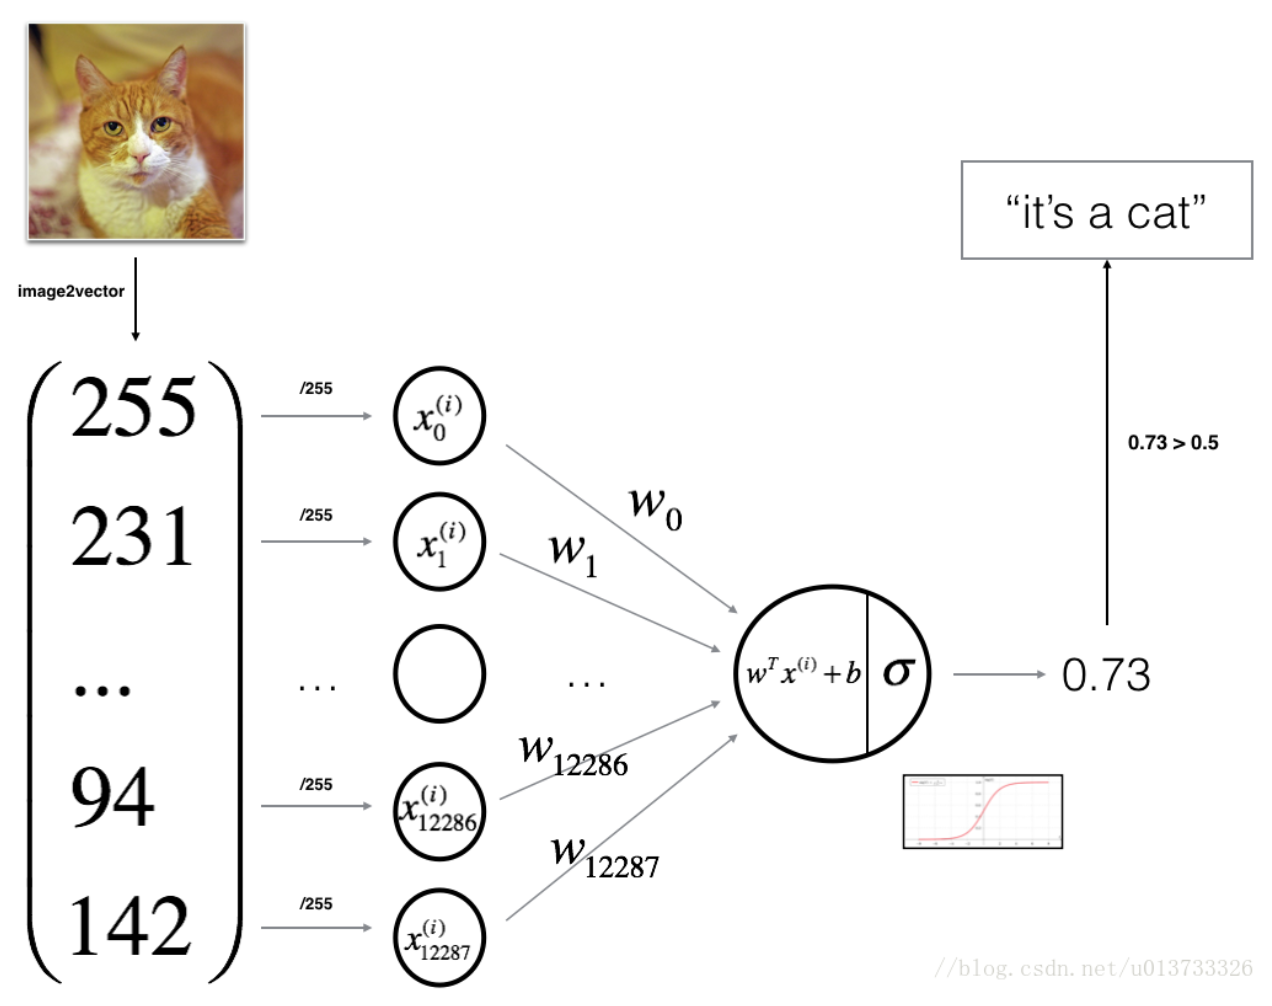
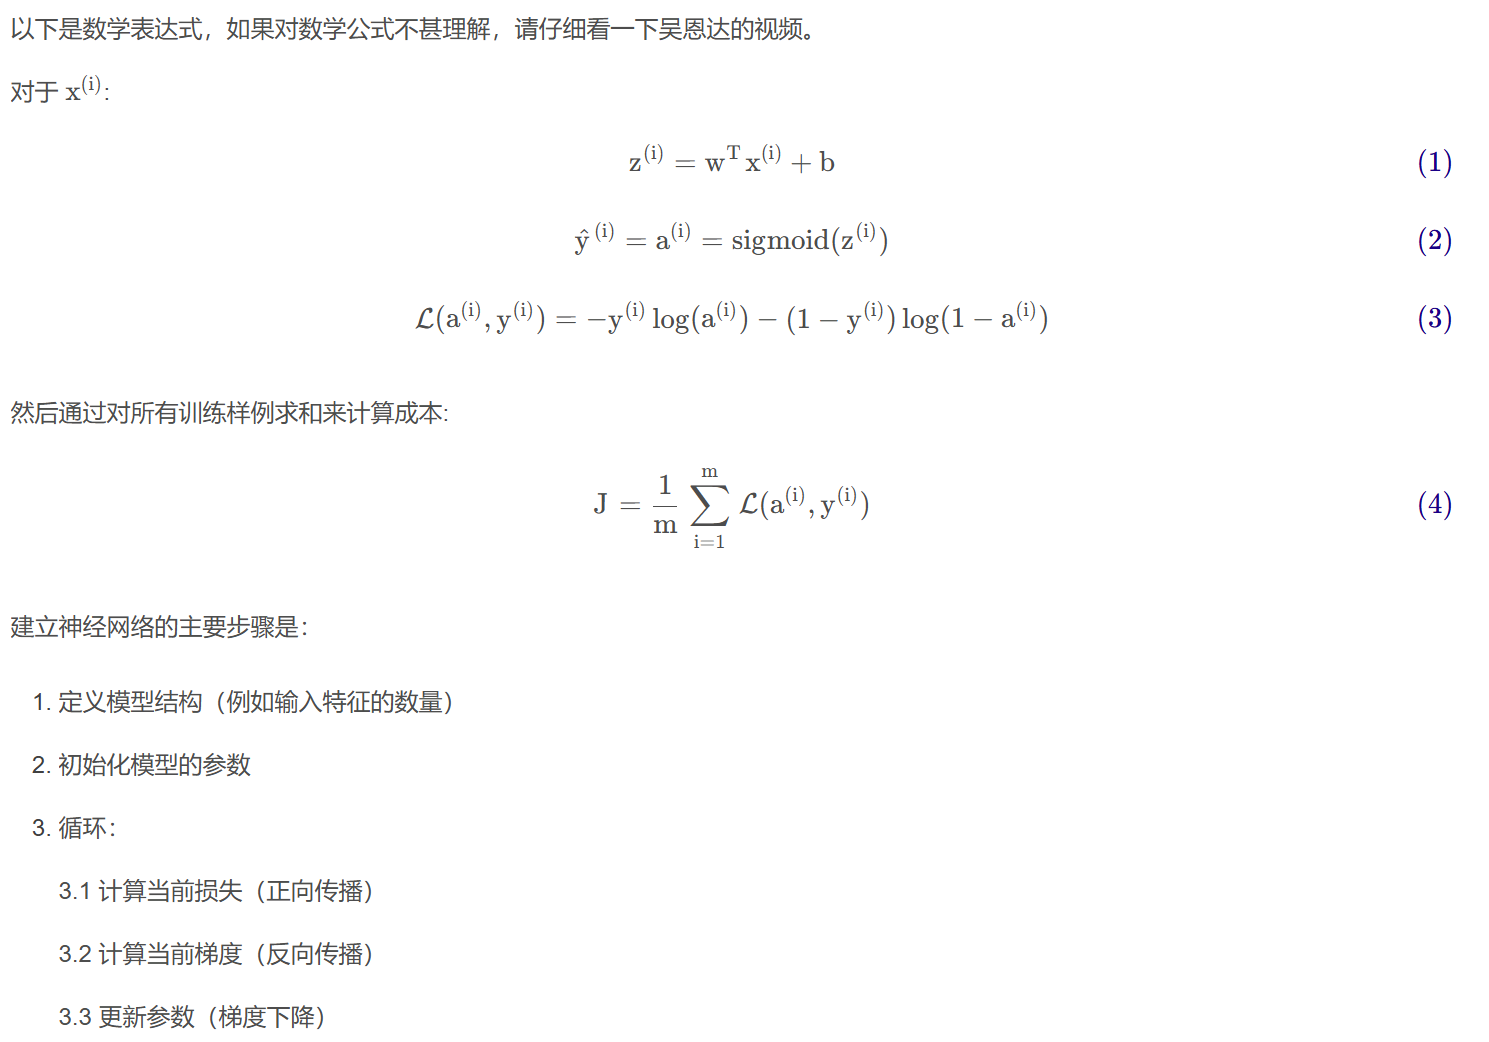

* 现在构建sigmoid()，需要使用 sigmoid（w ^ T x + b） 计算来做出预测。

In [24]:
def sigmoid(z):
    """
    参数：
        z  - 任何大小的标量或numpy数组。

    返回：
        s  -  sigmoid（z）
    """
    s = 1 / (1 + np.exp(-z))
    return s

* 我们可以测试一下sigmoid()，检查一下是否符合我们所需要的条件。

In [25]:
#测试sigmoid()
print("====================测试sigmoid====================")
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

====================测试sigmoid====================
sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


* 既然sigmoid测试好了，我们现在就可以初始化我们需要的参数w和b了。

In [26]:
def initialize_with_zeros(dim):
    """
        此函数为w创建一个维度为（dim，1）的0向量，并将b初始化为0。

        参数：
            dim  - 我们想要的w矢量的大小（或者这种情况下的参数数量）

        返回：
            w  - 维度为（dim，1）的初始化向量。
            b  - 初始化的标量（对应于偏差）
    """
    w = np.zeros(shape = (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return (w, b)

# np.zeros() 简要笔记

## 功能
创建一个指定形状的 numpy 数组，并用 0 填充。

## 函数形式
`np.zeros(shape, dtype=None, order='C')`

## 参数
- shape
  指定数组的形状，可以是整数或元组
  例如：(2, 3)、(dim, 1)

- dtype（可选）
  指定数组中元素的类型
  默认是 float64

- order（可选）
  内存存储顺序，默认 'C'（行优先）
  一般无需关心

## 返回值
- 返回一个 ndarray
- 形状由 shape 决定
- 所有元素初始化为 0

## 使用示例
`np.zeros((3, 1)) `
→ 生成一个 3 行 1 列、全为 0 的数组

## 逻辑回归中的作用
- 用于初始化权重向量 w
- 表示模型在训练前不带任何先验信息


* 初始化参数的函数已经构建好了，现在就可以执行“前向”和“后向”传播步骤来学习参数。

* 我们现在要实现一个计算成本函数及其渐变的函数propagate（）。

In [28]:
def propagate(w, b, X, Y):
    """
    实现前向和后向传播的成本函数及其梯度。
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 矩阵类型为（num_px * num_px * 3，训练数量）
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据数量)

    返回：
        cost- 逻辑回归的负对数似然成本
        dw  - 相对于w的损失梯度，因此与w相同的形状
        db  - 相对于b的损失梯度，因此与b的形状相同
    """
    m = X.shape[1]

    # 正向传播
    A = sigmoid(np.dot(w.T, X) + b) # 计算激活值
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) # 计算成本

    # 反向传播
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    # 断言确保数据正确
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    # 创建字典保存dw和db
    grads = {
        "dw": dw,
        "db": db,
    }

    return (grads, cost)

---

# 一、`assert` 是什么？为什么要用？

## 1️⃣ `assert` 是什么

`assert` 是 **运行时检查语句**，作用是：

> **如果条件不成立，程序立刻报错并停止**

语法：

```python
assert 条件
```

等价于：

```python
if not 条件:
    raise AssertionError
```

---

## 2️⃣ 你这段代码里的 `assert` 在检查什么？

### ✅ 第一个

```python
assert(dw.shape == w.shape)
```

**检查内容：**

* `dw` 的形状必须和 `w` 完全一致

**为什么要检查？**

* 梯度下降更新时会做：

```python
w = w - learning_rate * dw
```

如果 `dw.shape != w.shape`：

* 代码会直接算错
* 或者悄悄广播，结果更危险

👉 **这个 assert 是在防止“数学逻辑错误”**

---

### ✅ 第二个

```python
assert(db.dtype == float)
```

**检查内容：**

* `db` 必须是一个标量浮点数

**原因：**

* `b` 是标量
* 更新时要求 `db` 也是标量

👉 防止你哪天把 `db` 写成数组还不自知

---

### ✅ 第三个

```python
assert(cost.shape == ())
```

这个和下面的 `np.squeeze` 是一组，等会一起说。

---

## 3️⃣ 总结一句话

> **`assert` 的作用不是“让代码跑得更快”，
> 而是“让错误尽早暴露，而不是悄悄算错”。**

在教学代码、科研代码中 **非常常见**。

---

# 二、为什么要 `cost = np.squeeze(cost)`？

这是一个**非常关键但容易迷糊的点**。

---

## 1️⃣ 先说你现在的 `cost` 原本是什么形状

这一行：

```python
cost = (-1 / m) * np.sum(...)
```

在 numpy 里，**即使你算的是一个数**，它也可能是：

```text
array([[0.693]])
```

或者：

```text
array([0.693])
```

也就是说：

* 看起来像一个数
* 实际是 **0 维 / 1 维数组**

---

## 2️⃣ `np.squeeze` 是做什么的？

```python
cost = np.squeeze(cost)
```

功能一句话：

> **把只有 1 个元素的数组，压成真正的标量**

举例：

```python
np.squeeze(np.array([[3.14]])) → 3.14
np.squeeze(np.array([3.14]))   → 3.14
```

---

## 3️⃣ 为什么这里一定要把 `cost` 变成标量？

因为后面你会经常：

```python
print(cost)
costs.append(cost)
```

如果 `cost` 还是数组：

* `print` 看起来怪
* `append` 会变成 list 里套数组
* 画 loss 曲线时会出问题

👉 **教学代码希望 cost 就是一个“干净的数”**

---

## 4️⃣ `assert(cost.shape == ())` 在干什么？

```python
assert(cost.shape == ())
```

* `()` 表示 **0 维数组**
* 也就是 **标量**

👉 这行是在确认：

> “`cost` 已经被成功 squeeze 成一个标量了”

---

## 三、一句话把两件事都记住

> **`assert`：防止你在不知情的情况下算错**
> **`np.squeeze`：把“看起来像数的数组”变成真正的数**

---


* 写好之后我们来测试一下。

In [37]:
#测试一下propagate
print("====================测试propagate====================")
#初始化一些参数
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))
print("dw.shape = ", grads["dw"].shape)
print("db.shape = ", grads["db"].shape)
print("cost.shape = " + str(cost.shape))

====================测试propagate====================
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205
dw.shape =  (2, 1)
db.shape =  ()
cost.shape = ()


好，我们一步一步**手算一遍**，让你对 `propagate` 的输出有数。

先回顾这行测试代码里的数据：

```python
w = [[1],
     [2]]          # shape (2,1)

b = 2             # 标量

X = [[1, 2],
     [3, 4]]      # shape (2,2)，每一列是一个样本

Y = [[1, 0]]      # shape (1,2)，两个样本的标签
```

样本数：`m = 2`。

---

## 1. 前向传播：算 A 和 cost

### 1.1 先算 Z = wᵀ X + b

* wᵀ 是 `[1, 2]`（shape (1,2)）
* X 是 `[[1, 2], [3, 4]]`（shape (2,2)）

先算 `wᵀ X`：

* 第 1 个样本列 `[1, 3]`：
  [
  1*1 + 2*3 = 1 + 6 = 7
  ]
* 第 2 个样本列 `[2, 4]`：
  [
  1*2 + 2*4 = 2 + 8 = 10
  ]

所以：

```text
wᵀ X = [7, 10]
```

再加上偏置 `b = 2`：

```text
Z = [7+2, 10+2] = [9, 12]
```

---

### 1.2 算 A = sigmoid(Z)

sigmoid 定义：

[
\sigma(z) = \frac{1}{1 + e^{-z}}
]

分别对 9 和 12 计算：

```text
A₁ = σ(9)  ≈ 0.9998766054
A₂ = σ(12) ≈ 0.9999938558
```

所以：

```text
A = [A₁, A₂] ≈ [0.9998766054, 0.9999938558]
```

---

### 1.3 算 cost（逻辑回归的损失）

公式（对 m 个样本）：

[
\text{cost} = -\frac{1}{m} \sum_{i=1}^m \Big( y^{(i)} \log a^{(i)} + (1-y^{(i)}) \log(1-a^{(i)}) \Big)
]

代入本例：

* 第 1 个样本：`y₁ = 1` → 项为 `log(A₁)`
* 第 2 个样本：`y₂ = 0` → 项为 `log(1 - A₂)`

所以：

[
\text{cost} = -\frac{1}{2} \Big( \log(A₁) + \log(1 - A₂) \Big)
]

数值上：

* `log(A₁) ≈ -0.0001234022`
* `1 - A₂ ≈ 6.144×10^{-6}`
* `log(1 - A₂) ≈ -12.0000061442`

代入：

[
\text{cost} = -\frac{1}{2} \big( -0.0001234 - 12.0000061 \big)
≈ 6.00006477
]

这就对应你程序里的：

```text
cost = 6.000064773192205
```

---

## 2. 反向传播：算 dw 和 db

公式：

* [
  dZ = A - Y
  ]
* [
  dw = \frac{1}{m} X , dZ^T
  ]
* [
  db = \frac{1}{m} \sum_{i=1}^m (a^{(i)} - y^{(i)})
  ]

---

### 2.1 先算 dZ = A - Y

```text
A ≈ [0.9998766054, 0.9999938558]
Y = [1, 0]
```

逐元素相减：

```text
A - Y = [A₁ - 1, A₂ - 0]
      ≈ [-0.0001233946, 0.9999938558]
```

作为列向量：

```text
dZ^T =
[[-0.0001233946],
 [ 0.9999938558]]
```

---

### 2.2 算 dw = (1/m) · X · dZᵀ

X 是：

```text
X = [[1, 2],
     [3, 4]]
```

先算矩阵乘法 `X · dZ^T`：

第一行（对应 dw 的第 1 个元素）：

[
1 * (-0.0001233946) + 2 * 0.9999938558
≈ -0.0001234 + 1.9999877
≈ 1.9998643
]

第二行（对应 dw 的第 2 个元素）：

[
3 * (-0.0001233946) + 4 * 0.9999938558
≈ -0.0003702 + 3.9999754
≈ 3.9996052
]

然后除以 m=2：

```text
dw₁ = 1.9998643 / 2 ≈ 0.99993216
dw₂ = 3.9996052 / 2 ≈ 1.99980262
```

所以：

```text
dw ≈ [[0.99993216],
      [1.99980262]]
```

这和你程序输出完全一致：

```text
dw = [[0.99993216]
      [1.99980262]]
```

---

### 2.3 算 db = (1/m) · sum(A - Y)

我们之前已经有：

```text
A - Y = [A₁ - 1, A₂ - 0]
      ≈ [-0.0001233946, 0.9999938558]
```

先求和：

```text
(A₁ - 1) + (A₂ - 0)
≈ -0.0001233946 + 0.9999938558
≈ 0.9998704612
```

再除以 m = 2：

```text
db ≈ 0.9998704612 / 2 ≈ 0.49993523
```

对应你的输出：

```text
db = 0.49993523062470574
```

---

## 3. 总结一下你这组测试的意义

通过手算，我们验证了：

* `A` 的计算是对的
* `cost` 的公式和实现是对的
* `dw`、`db` 的梯度计算是对的
* 你的 `propagate` 函数数值结果完全符合数学推导

> 换句话说：
> **在这个简化案例上，你已经用“小样本手算”证明了自己写的前向 + 反向传播逻辑是正确的。**

如果你愿意，下一步我们可以看：

* 用这个 `dw`、`db` 去更新一次 `w`、`b`，手算看看更新后的参数是多少（对应 `optimize` 里的那一步）
* 或者开始讲 `optimize()` 和 `predict()` 函数的数学意义

你选一个，我继续帮你算。


* 现在，我要使用渐变下降更新参数。

* 目标是通过最小化成本函数 J JJ 来学习 w ww和b bb 。对于参数 θ \thetaθ ，更新规则是 $ \theta = \theta - \alpha \text{ } d\theta$，其中 α \alphaα 是学习率

In [39]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    此函数通过运行梯度下降算法来优化w和b

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        learning_rate  - 梯度下降更新规则的学习率
        print_cost  - 每100步打印一次损失值

    返回：
        params  - 包含权重w和偏差b的字典
        grads  - 包含权重和偏差相对于成本函数的梯度的字典
        成本 - 优化期间计算的所有成本列表，将用于绘制学习曲线。

    提示：
    我们需要写下两个步骤并遍历它们：
        1）计算当前参数的成本和梯度，使用propagate（）。
        2）使用w和b的梯度下降法则更新参数。
    """
    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        # 记录成本
        if i % 100 == 0:
            costs.append(cost)

        # 打印成本数据
        if (print_cost) and (i % 100 == 0):
            print("迭代的次数：%i，误差值：%f" %(i, cost))

    params = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }

    return (params, grads, costs)

* 现在就让我们来测试一下优化函数：

In [42]:
#测试optimize
print("====================测试optimize====================")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
params , grads , costs = optimize(w , b , X , Y , num_iterations=100 , learning_rate = 0.009 , print_cost = True)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


====================测试optimize====================
迭代的次数：0，误差值：6.000065
w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


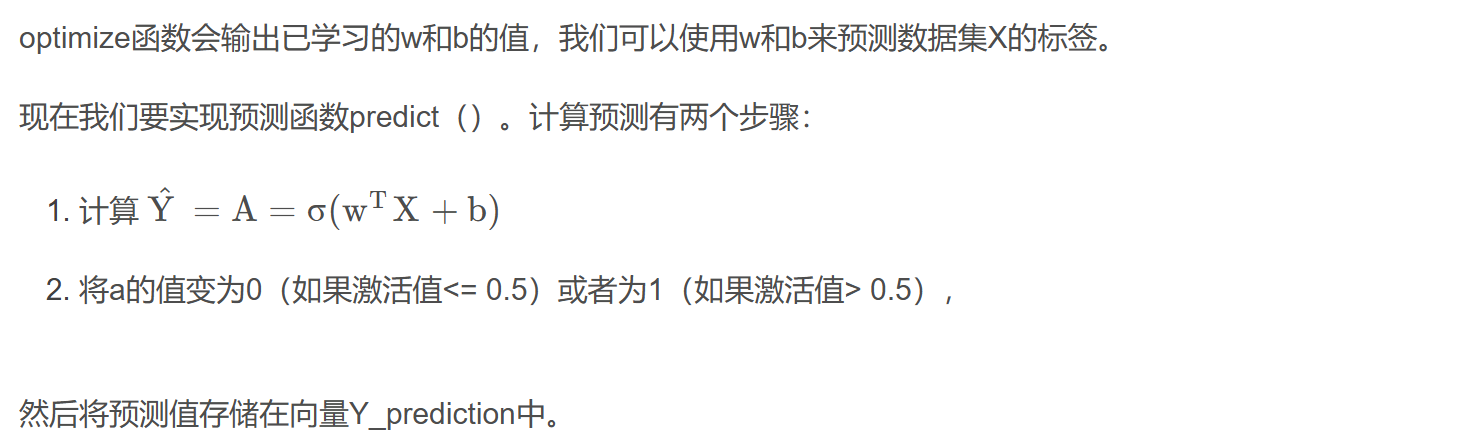

In [43]:
def predict(w, b, X):
    """
    使用学习逻辑回归参数logistic （w，b）预测标签是0还是1，

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数据

    返回：
        Y_prediction  - 包含X中所有图片的所有预测【0 | 1】的一个numpy数组（向量）

    """
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # 预测猫在图片中出现的概率
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        # 将概率a [0，i]转换为实际预测p [0，i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    # 断言
    assert(Y_prediction.shape == (1, m))

    return Y_prediction

* 测试一下。

In [44]:
#测试predict
print("====================测试predict====================")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print("predictions = " + str(predict(w, b, X)))

====================测试predict====================
predictions = [[1. 1.]]


* 就目前而言，我们基本上把所有的东西都做完了，现在我们要把这些函数统统整合到一个model()函数中，届时只需要调用一个model()就基本上完成所有的事了。

In [47]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    通过调用之前实现的函数来构建逻辑回归模型

    参数：
        X_train  - numpy的数组,维度为（num_px * num_px * 3，m_train）的训练集
        Y_train  - numpy的数组,维度为（1，m_train）（矢量）的训练标签集
        X_test   - numpy的数组,维度为（num_px * num_px * 3，m_test）的测试集
        Y_test   - numpy的数组,维度为（1，m_test）的（向量）的测试标签集
        num_iterations  - 表示用于优化参数的迭代次数的超参数
        learning_rate  - 表示optimize（）更新规则中使用的学习速率的超参数
        print_cost  - 设置为true以每100次迭代打印成本

    返回：
        d  - 包含有关模型信息的字典。
    """
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # 从字典“参数”中检索参数w和b
    w, b = parameters["w"], parameters["b"]

    # 预测测试/训练集的例子
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # 打印训练后的准确性
    print("训练集准确性：", format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100), "%")
    print("测试机准确性：", format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100), "%")

    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations,
    }

    return d

迭代的次数：0，误差值：0.693147
迭代的次数：100，误差值：0.584508
迭代的次数：200，误差值：0.466949
迭代的次数：300，误差值：0.376007
迭代的次数：400，误差值：0.331463
迭代的次数：500，误差值：0.303273
迭代的次数：600，误差值：0.279880
迭代的次数：700，误差值：0.260042
迭代的次数：800，误差值：0.242941
迭代的次数：900，误差值：0.228004
迭代的次数：1000，误差值：0.214820
迭代的次数：1100，误差值：0.203078
迭代的次数：1200，误差值：0.192544
迭代的次数：1300，误差值：0.183033
迭代的次数：1400，误差值：0.174399
迭代的次数：1500，误差值：0.166521
迭代的次数：1600，误差值：0.159305
迭代的次数：1700，误差值：0.152667
迭代的次数：1800，误差值：0.146542
迭代的次数：1900，误差值：0.140872
训练集准确性： 99.04306220095694 %
测试机准确性： 70.0 %


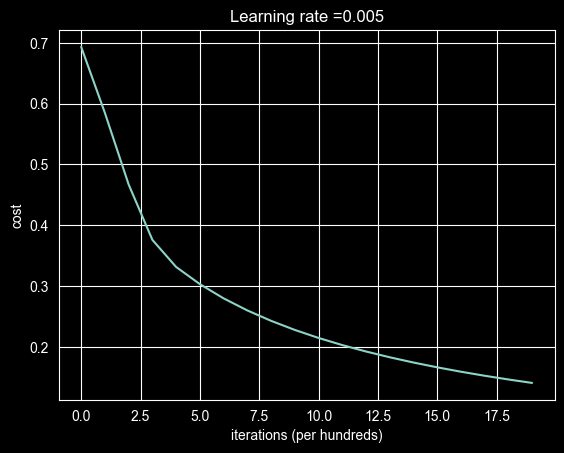

In [48]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

# 绘制图
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

* 让我们进一步分析一下，并研究学习率alpha的可能选择。为了让渐变下降起作用，我们必须明智地选择学习速率。学习率α \alphaα 决定了我们更新参数的速度。如果学习率过高，我们可能会“超过”最优值。同样，如果它太小，我们将需要太多迭代才能收敛到最佳值。这就是为什么使用良好调整的学习率至关重要的原因。

* 我们可以比较一下我们模型的学习曲线和几种学习速率的选择。也可以尝试使用不同于我们初始化的learning_rates变量包含的三个值，并看一下会发生什么。


learning rate is: 0.01
训练集准确性： 99.52153110047847 %
测试机准确性： 68.0 %

-------------------------------------------------------

learning rate is: 0.001
训练集准确性： 88.99521531100478 %
测试机准确性： 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
训练集准确性： 68.42105263157895 %
测试机准确性： 36.0 %

-------------------------------------------------------



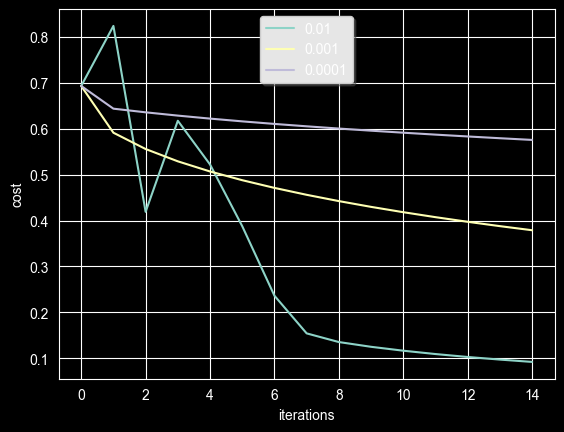

In [49]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
